# Loan Lending Case Study

### Importing all the required analysis and visualization libraries

In [1501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1650]:
!pip freeze | egrep "pandas|numpy|matplotlib|seaborn"

matplotlib==3.9.2
matplotlib-inline @ file:///Users/builder/cbouss/perseverance-python-buildout/croot/matplotlib-inline_1699242375920/work
numpy @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a51i_mbs7m/croot/numpy_and_numpy_base_1708638620867/work/dist/numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl#sha256=37afb6b734a197702d848df93bd67c10b52f6467d56e518950d84b6b1c949d27
numpydoc @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_69xghc3i3n/croot/numpydoc_1718279166747/work
pandas @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_b53hgou29t/croot/pandas_1718308972393/work/dist/pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl#sha256=1956b71d1baac8b370fd9deac6100aadefda112447dca816a81ecbf3ea4eb3e6
seaborn @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_f3_ueh70ud/croot/seaborn_1718302932585/work


### Read the loan dataset and preliminary analysis on all columns

In [1503]:
# load the dataset
loan_df = pd.read_csv('loan.csv')

/var/folders/xb/79_w7pls1mv1jy9tx3j4kmqc0000gn/T/ipykernel_19322/2092613837.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


In [1504]:
# get the total number of rows and column 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1505]:
# Checking the dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1506]:
# getting the list of columns which are totally empty
null_df = loan_df.count() == 0
null_columns_list = list(null_df[null_df].index)
print("List of null columns :",len(null_columns_list))

List of null columns : 54


In [1507]:
# dropping the columns which are totally empty
loan_df.drop(null_columns_list,axis=1,inplace=True)

### Recheck the null columns and check if there are columns with a lot of null values

In [1509]:
#Rechecking the number of non nulls 
loan_df.count().sort_values()

next_pymnt_d                   1140
mths_since_last_record         2786
mths_since_last_delinq        14035
desc                          26775
emp_title                     37258
emp_length                    38642
pub_rec_bankruptcies          39020
last_pymnt_d                  39646
chargeoff_within_12_mths      39661
collections_12_mths_ex_med    39661
revol_util                    39667
tax_liens                     39678
title                         39706
last_credit_pull_d            39715
home_ownership                39717
out_prncp_inv                 39717
total_pymnt                   39717
total_pymnt_inv               39717
total_rec_prncp               39717
total_rec_int                 39717
total_rec_late_fee            39717
recoveries                    39717
collection_recovery_fee       39717
last_pymnt_amnt               39717
out_prncp                     39717
funded_amnt                   39717
loan_amnt                     39717
policy_code                 

In [1510]:
# Calculating the columns which have null values for more than 90% of the dataset
majority_null_columns = loan_df.count() < 39717*0.9
majority_null_columns_list = list(majority_null_columns[majority_null_columns].index)
majority_null_columns_list

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [1511]:
# dropping those columns
loan_df.drop(majority_null_columns_list,axis=1,inplace=True)

In [1512]:
# revisiting the columns after dropping required columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [1513]:
# checking the non numeric columns to check if they can be converted to numeric columns
non_numeric_columns = loan_df.dtypes == object
non_numeric_columns_list = list(non_numeric_columns[non_numeric_columns].index)

In [1514]:
print("Number of non-numeric columns : ",len(non_numeric_columns_list))

Number of non-numeric columns :  22


### Manipulating the columns which are non-numeric and adding additional columns to gather more insights

In [1516]:
# dropping NA rows to convert it to a numeric columns
loan_df.dropna(subset='emp_length',inplace=True)

In [1517]:
# Converting all necessary non-numeric to numeric contains to analyze 
loan_df['term'] = loan_df['term'].apply(lambda x:int(x.rstrip(' months')))
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:float(x.rstrip('%')))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: float(str(x).strip('%')))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: int(str(x).rstrip(' years').rstrip('+').strip('<')))

### Checking if null containing rows can be added with new values

In [1519]:
# investigating null containing rows
null_containing_columns = loan_df.count() != len(loan_df)

In [1520]:
null_containing_columns[null_containing_columns]

emp_title                     True
title                         True
revol_util                    True
last_pymnt_d                  True
last_credit_pull_d            True
collections_12_mths_ex_med    True
chargeoff_within_12_mths      True
pub_rec_bankruptcies          True
tax_liens                     True
dtype: bool

In [1521]:
null_col_list = list(null_containing_columns[null_containing_columns].index)

In [1522]:
# columns with only 1 value
loan_df[['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','acc_now_delinq','pymnt_plan','initial_list_status','application_type','policy_code','delinq_amnt']].value_counts()

chargeoff_within_12_mths  collections_12_mths_ex_med  tax_liens  acc_now_delinq  pymnt_plan  initial_list_status  application_type  policy_code  delinq_amnt
0.0                       0.0                         0.0        0               n           f                    INDIVIDUAL        1            0              38586
Name: count, dtype: int64

In [1523]:
# Columns which are irrelevant to find risky applicants
loan_df.drop(['id', 'member_id','url','out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [1524]:
# dropping the columns 
loan_df.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','acc_now_delinq','pymnt_plan','initial_list_status','policy_code','application_type','delinq_amnt'],axis=1,inplace=True)

In [1525]:
# Finding the count of most null values in a row
loan_df.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    36433
1     2157
2       51
3        1
Name: count, dtype: int64

In [1526]:
# dropping the rows which have more than 3 null values
loan_df = loan_df.loc[~(loan_df.isnull().sum(axis=1) >= 3)]

In [1527]:
# understanding total number of columns/rows to analyze 
loan_df.shape

(38641, 39)

In [1528]:
# checking loan status values
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32144
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [1529]:
# Choosing subset of data which is not current
non_current_loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [1636]:
non_current_loan_df.shape

(37543, 42)

In [1530]:
# converting loan status to numeric 1 - Default 0 - Fully Paid
non_current_loan_df['Default'] = non_current_loan_df['loan_status'].apply(lambda x : 1 if x== 'Charged Off' else 0)

/var/folders/xb/79_w7pls1mv1jy9tx3j4kmqc0000gn/T/ipykernel_19322/3924148478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_current_loan_df['Default'] = non_current_loan_df['loan_status'].apply(lambda x : 1 if x== 'Charged Off' else 0)


In [1532]:
# computing numeric columns
float_numeric_columns = (loan_df.dtypes == float)
float_numeric_columns_list =  list(float_numeric_columns[float_numeric_columns].index)
int_numeric_columns = (loan_df.dtypes == int)
int_numeric_columns_list =  list(int_numeric_columns[int_numeric_columns].index)
numeric_columns = float_numeric_columns_list + int_numeric_columns_list

### Univariate Analysis

In [1536]:
# Fetching columns part of the selected dataset
non_current_loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'Default', 'Loan Year'],
      dtype='object')

### Interesting Columns : Columns which might have relation to whether applicant is risky or not 
- int_rate : based on high interest
- installment : installment amount
- grade : grade assigned to borrower based on previous history
- home_ownership : type of home owned by loaner
- verification_status : if source income was verified
- purpose : reason for the loan
- emp_length : Length of employment
- term : Length of the loan

## Grade Analysis

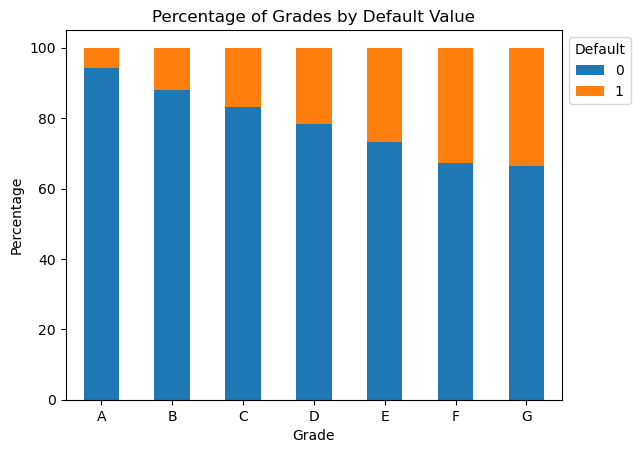

In [1640]:
grade_summary = non_current_loan_df[['grade','Default','loan_amnt']].groupby(['grade','Default']).size().unstack(fill_value=0)
grade_percentages = grade_summary.div(grade_summary.sum(axis=1), axis=0) * 100
grade_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage of Grades by Default Value')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.legend(title='Default', labels=['0', '1'],bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=0)

plt.show()

### As the grades increase the percentage of defaulters also increase

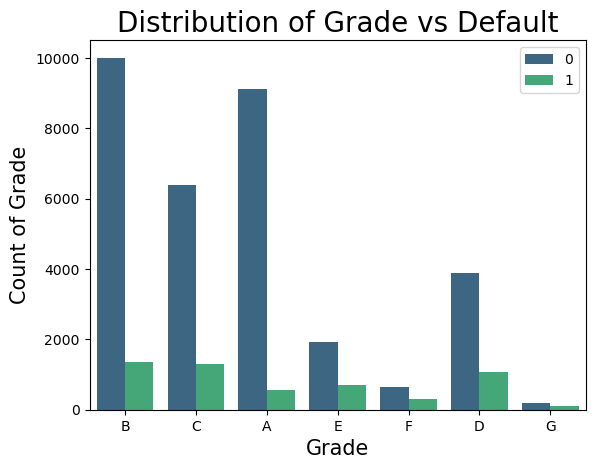

In [1541]:
sns.countplot(data=non_current_loan_df, x="grade", hue="Default", palette="viridis")
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Count of Grade',fontsize=15)
plt.title('Distribution of Grade vs Default',fontsize=20)
plt.legend()
plt.show()

### Most Number of Grade Loans are B,C,A but if we look at defaults B,C,D,E,F Grade loans are likely to default more 


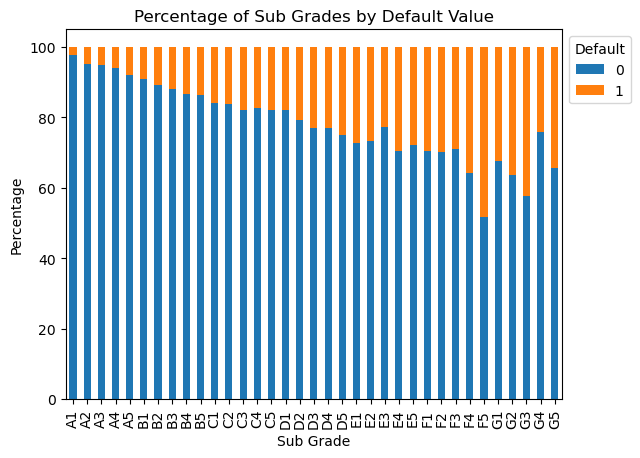

In [1642]:
grade_summary = non_current_loan_df[['sub_grade','Default','loan_amnt']].groupby(['sub_grade','Default']).size().unstack(fill_value=0)
grade_percentages = grade_summary.div(grade_summary.sum(axis=1), axis=0) * 100
grade_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage of Sub Grades by Default Value')
plt.xlabel('Sub Grade')
plt.ylabel('Percentage')
plt.legend(title='Default', labels=['0', '1'],bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

#### As the sub grades increase the percentage of defaulters increase. Within subgrades usually the 5th subgrades have the highest percentage of defaulters

## Loan Interest Analysis

/var/folders/xb/79_w7pls1mv1jy9tx3j4kmqc0000gn/T/ipykernel_19322/2378379402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_current_loan_df['Rate Bin'] = pd.cut(non_current_loan_df['int_rate'], bins=bins, labels=labels, right=False)
/var/folders/xb/79_w7pls1mv1jy9tx3j4kmqc0000gn/T/ipykernel_19322/2378379402.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_summary = non_current_loan_df.groupby('Rate Bin')['Default'].agg(['count', 'sum'])


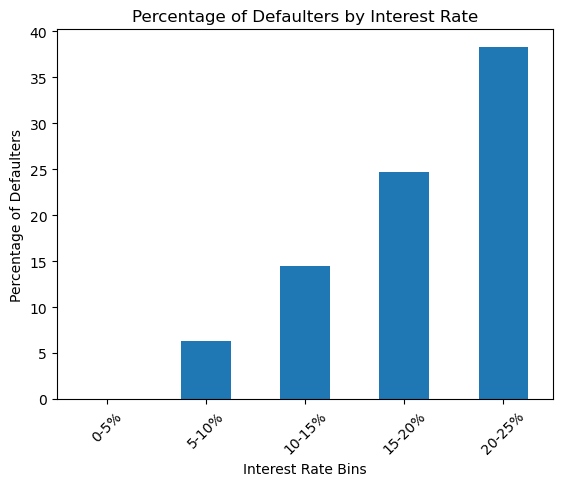

In [1544]:

bins = [0, 5, 10, 15, 20,25]  # Define your bins
labels = ['0-5%', '5-10%', '10-15%', '15-20%','20-25%']
non_current_loan_df['Rate Bin'] = pd.cut(non_current_loan_df['int_rate'], bins=bins, labels=labels, right=False)

# Calculate default percentages
int_rate_summary = non_current_loan_df.groupby('Rate Bin')['Default'].agg(['count', 'sum'])
int_rate_summary['Default Percentage'] = (int_rate_summary['sum'] / int_rate_summary['count']) * 100

# Plot
int_rate_summary['Default Percentage'].plot(kind='bar')
plt.title('Percentage of Defaulters by Interest Rate')
plt.xlabel('Interest Rate Bins')
plt.ylabel('Percentage of Defaulters')
plt.xticks(rotation=45)
plt.show()

#### Most Defaulters have interest rate between 15-25%
People with higher interest rates are likely to default on their loans

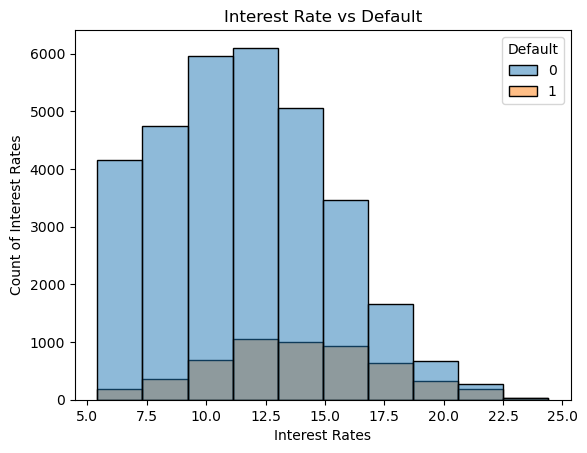

In [1546]:
sns.histplot(data=non_current_loan_df,x='int_rate',bins=10,hue='Default')
plt.title('Interest Rate vs Default')
plt.xlabel('Interest Rates')
plt.ylabel('Count of Interest Rates')
plt.show()

### Installment Amount Analysis

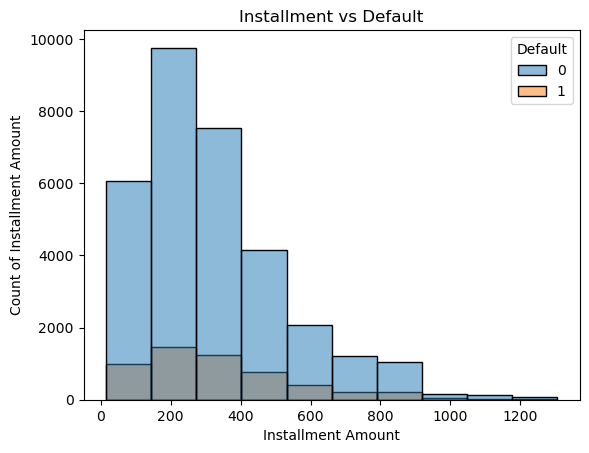

In [1548]:
sns.histplot(data=non_current_loan_df,x='installment',bins=10,hue='Default')
plt.title('Installment vs Default')
plt.xlabel('Installment Amount')
plt.ylabel('Count of Installment Amount')
plt.show()

#### No insights derived from installments amount

### Home Ownership Analysis

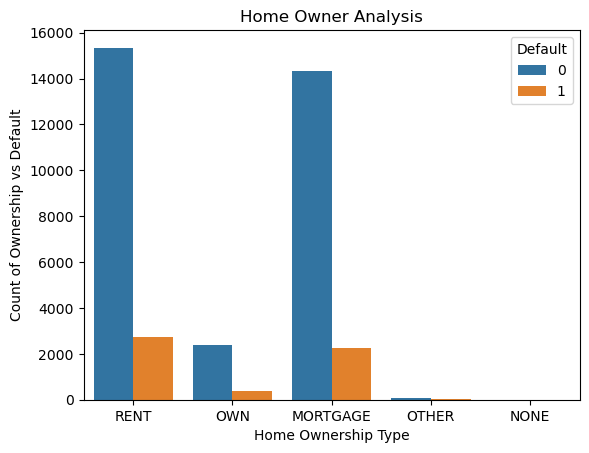

In [1551]:
sns.countplot(data=non_current_loan_df,x='home_ownership',hue='Default')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count of Ownership vs Default')
plt.title('Home Owner Analysis')
plt.show()

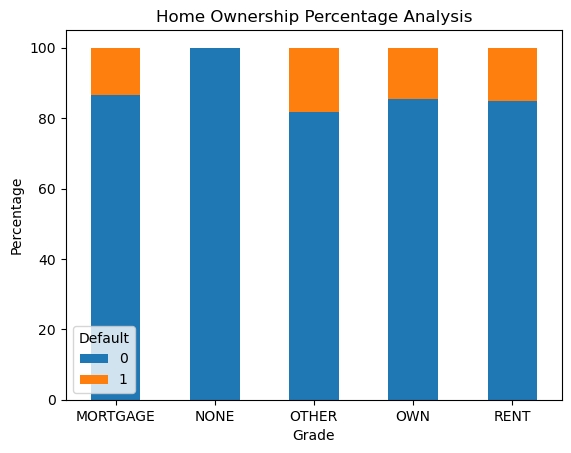

In [1627]:
home_owner_summary = non_current_loan_df[['home_ownership','Default','loan_amnt']].groupby(['home_ownership','Default']).size().unstack(fill_value=0)
home_owner_percentages = home_owner_summary.div(home_owner_summary.sum(axis=1), axis=0) * 100
home_owner_percentages.plot(kind='bar', stacked=True)
plt.title('Home Ownership Percentage Analysis')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.legend(title='Default', labels=['0', '1'])
plt.xticks(rotation=0)
plt.show()

#### Irrespective of the ownership type the defaults are spread across

### Verification Status Analysis

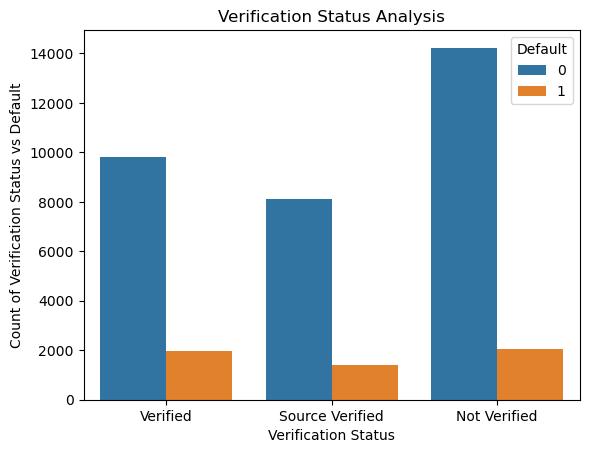

In [1555]:
sns.countplot(data=non_current_loan_df,x='verification_status',hue='Default')
plt.xlabel('Verification Status')
plt.ylabel('Count of Verification Status vs Default')
plt.title('Verification Status Analysis')
plt.show()

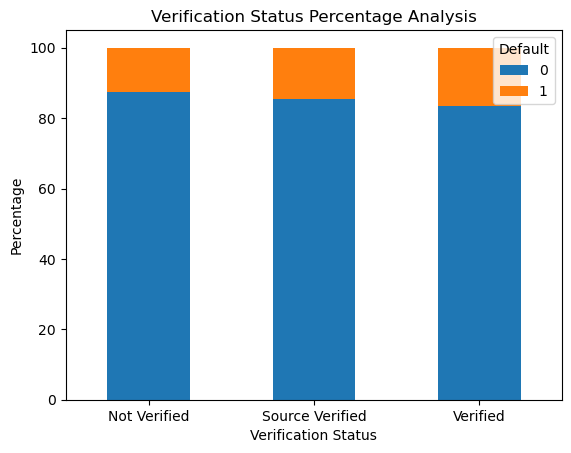

In [1629]:
ver_status_summary = non_current_loan_df[['verification_status','Default','loan_amnt']].groupby(['verification_status','Default']).size().unstack(fill_value=0)
ver_status_percentages = ver_status_summary.div(ver_status_summary.sum(axis=1), axis=0) * 100
ver_status_percentages.plot(kind='bar', stacked=True)
plt.title('Verification Status Percentage Analysis')
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.legend(title='Default', labels=['0', '1'])
plt.xticks(rotation=0)
plt.show()

#### Not much valuable insights derived from verfication status

### Term Analysis

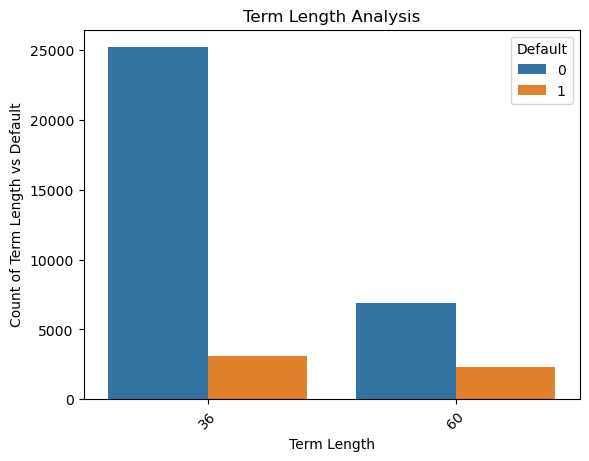

In [1621]:
sns.countplot(data=non_current_loan_df,x='term',hue='Default')
plt.xlabel('Term Length')
plt.ylabel('Count of Term Length vs Default')
plt.title('Term Length Analysis')
plt.xticks(rotation=45)
plt.show()

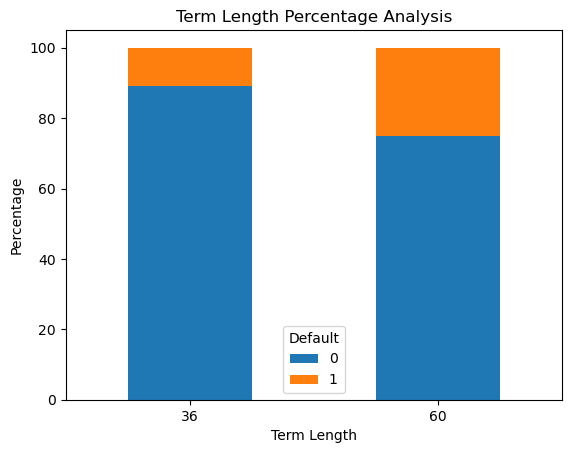

In [1623]:
grade_summary = non_current_loan_df[['term','Default','loan_amnt']].groupby(['term','Default']).size().unstack(fill_value=0)
grade_percentages = grade_summary.div(grade_summary.sum(axis=1), axis=0) * 100
grade_percentages.plot(kind='bar', stacked=True)
plt.title('Term Length Percentage Analysis')
plt.xlabel('Term Length')
plt.ylabel('Percentage')
plt.legend(title='Default', labels=['0', '1'])
plt.xticks(rotation=0)
plt.show()

#### There are higher chances of defaulting as the term length increases

## Final Observations
- People with a weaker grade (C,D,E,F,G) of loan are more likely to default on the loans.
- People with weaker subgrades (C5,D5,E5,F5,G5) are more likely to default on the loans
- People with higher interest rates are more likely to default on loans
- Even if the income is verified, there is likelyhood of the person defaulting on loans
- As term value increases the chances of the person defaulting increases
